- Using the dataset below, build a decision tree, with Buys as the target variable, to help in buying lipsticks in the future.
- Find the root node of the decision tree.
- Find the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
dataset = [
    ['<21', 'High', 'Male', 'Single', 'No'],
    ['<21', 'High', 'Male', 'Married', 'No'],
    ['21-35', 'High', 'Male', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Married', 'No'],
    ['21-35', 'Low', 'Female', 'Married', 'Yes'],
    ['<21', 'Medium', 'Male', 'Single', 'No'],
    ['<21', 'Low', 'Female', 'Married', 'Yes'],
    ['>35', 'Medium', 'Female', 'Single', 'Yes'],
    ['<21', 'Medium', 'Female', 'Married', 'Yes'],
    ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
    ['21-35', 'High', 'Female', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Married', 'No']
]
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']

In [ ]:
data = pd.DataFrame(dataset, columns=columns) 
# or pd.read_csv, whichever is availbable
data.head()

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes


In [ ]:
le = LabelEncoder()
data = data.apply(le.fit_transform)

x = data.iloc[:, : -1] # exclude last column (buys)
x.head()

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1


In [ ]:
y = data.iloc[:, -1] # Select only last column (buys)
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Buys, dtype: int64

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x,y)
# Age = 1, Income = 1, Gender = 0, Marital Status = 0
pred = dt_classifier.predict([[1, 1, 0, 0]])
pred[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


[1]

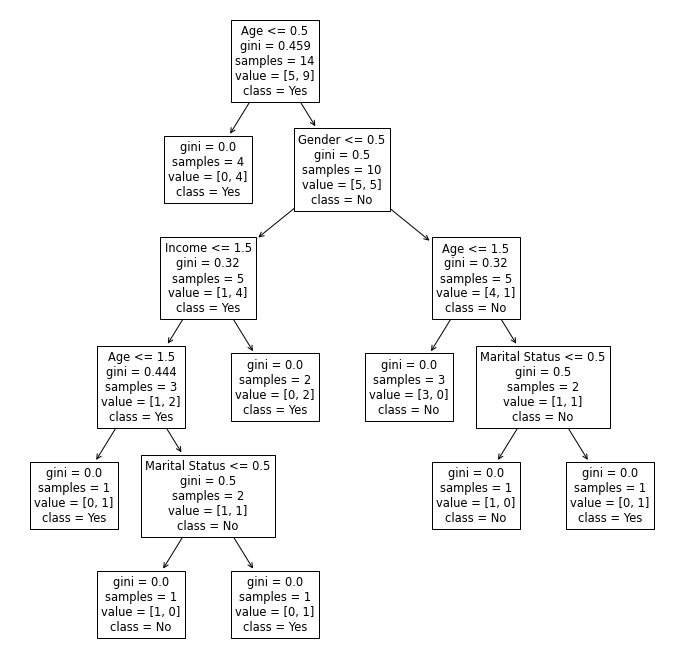

In [ ]:
plt.figure(figsize=(12,12))
pt = plot_tree(
    decision_tree = dt_classifier,
    feature_names = data.columns,
    class_names = ["Yes", "No"]
)
plt.show()